In [1]:
import tensorflow as tf
import os
import numpy as np

In [2]:
base_dir=r"G:\Online Class\Thesis Related\Dataset_of_Notes\Dataset"

In [3]:
IMAGE_SIZE=224
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    
    
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    
    validation_split=0.2
)

In [4]:
train_genarator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
    

) 

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
) 

Found 60435 images belonging to 9 classes.
Found 15105 images belonging to 9 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [6]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [7]:
for layer in vgg.layers:
    layer.trainable=False

In [8]:
folders=glob(r"G:\Online Class\Thesis Related\Dataset_of_Notes\Dataset\*")
print(len(folders))

9


In [9]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epoch=5
history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/5
945/945 [==============================] - 24024s 25s/step - loss: 0.0271 - accuracy: 0.9765 - val_loss: 0.0668 - val_accuracy: 0.9009
Epoch 2/5
945/945 [==============================] - 26024s 28s/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.0612 - val_accuracy: 0.9088
Epoch 3/5
945/945 [==============================] - 24440s 26s/step - loss: 9.4945e-04 - accuracy: 0.9999 - val_loss: 0.0644 - val_accuracy: 0.9027
Epoch 4/5
945/945 [==============================] - 24019s 25s/step - loss: 5.5386e-04 - accuracy: 0.9999 - val_loss: 0.0637 - val_accuracy: 0.9121
Epoch 5/5
945/945 [==============================] - 24185s 26s/step - loss: 3.3992e-04 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9123


In [55]:
import numpy as np
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

model.save("your_trained_model.h5")

In [2]:
#testing software 04 05 40 
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# Set the paths to your image folders
#train_dir = 'D:/potatoo/images/Kriisan/train'
#validation_dir = 'D:/potatoo/images/Kriisan/validation'
#test_dir = 'D:/potatoo/images/Kriisan/test'

# Set the parameters for the data generators
batch_size = 64
img_height, img_width = 224, 224

# Define the class names
class_names = ["2tk","5tk","10tk","20tk","50tk","100tk","200tk","500tk","1000tk"]#Potato___Late_blight

# Load the trained model
model = tf.keras.models.load_model(r"C:\Users\User\Desktop\Thesis\Work\notes_detection.h5")
#D:/potatoo/images/Kriisan/hiShuvolast.h5 
# Create the Tkinter GUI
root = tk.Tk()
root.title("Bangladeshi Currency Classification")
root.geometry("600x400")
root.configure(bg="yellow")  # Set the window background color

# Function to classify the selected image
def classify_image():
    file_path = filedialog.askopenfilename()
    
    if file_path:
        # Load and preprocess the image
        image = Image.open(file_path)
        image = image.resize((img_width, img_height))
        image = image.convert("RGB")
        image_array = np.array(image) / 255.0
        image_array = np.expand_dims(image_array, axis=0)

        # Make a prediction
        prediction = model.predict(image_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class = class_names[predicted_class_index]
        accuracy = prediction[0][predicted_class_index]

        # Display the image and prediction
        image = ImageTk.PhotoImage(image)  # Convert PIL image to Tkinter PhotoImage
        image_label.configure(image=image)
        image_label.image = image  # Store a reference to the image to prevent garbage collection

        result_label.config(text=f"Predicted class: {predicted_class}\nAccuracy: {accuracy:.2%}")
    else:
        result_label.config(text="No image selected.")

# Create GUI components
select_button = tk.Button(root, text="Select Image", command=classify_image, bg="hotpink", fg="white")  # Set the button color
select_button.pack(pady=10)

image_label = tk.Label(root)
image_label.pack(pady=10)

result_label = tk.Label(root, font=("Arial", 12))
result_label.pack(pady=10)

# Run the Tkinter event loop
root.mainloop()


1/1 [==============================] - 2s 2s/step


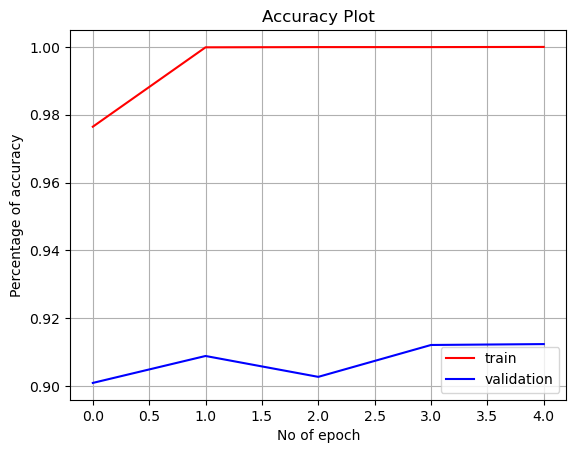

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Accuracy Plot')
plt.xlabel('No of epoch')
plt.ylabel('Percentage of accuracy')
plt.grid(True)
plt.legend()
plt.show()

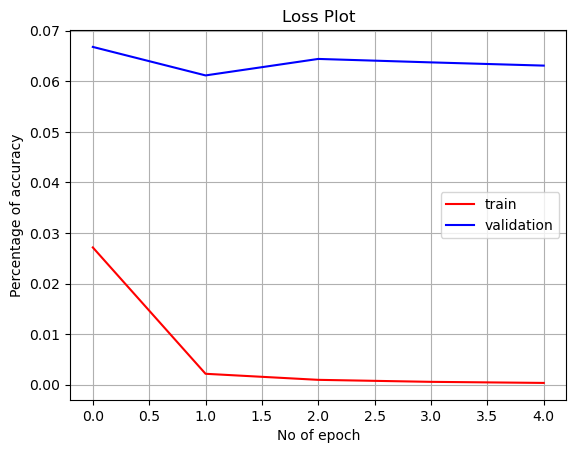

In [52]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss Plot')
plt.xlabel('No of epoch')
plt.ylabel('Percentage of accuracy')
plt.grid(True)
plt.legend()
plt.show()